### Generating Random numbers for unique distribuitions
#### The algorithms used here are the acceptance - rejection method, the reverse method and combination of them

In [6]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import random as rand

# function to generate the random numbers for the given distribution and points using the acceptance - rejection method
def acceptance_rejection(n, f, rng_x, rng_y):
    # input: n is the number of random points needed to generate as the user defines
    #        f is the distribution of interest
    #        rng_x, rng_y are the ranges for the rectangular area as needed for the acceptance rejection method
    
    nall = 0 # number of points used in total
    ngood=  0 # number of points that are generated for the distribution inside the distribution area that are not rejected 
    xgood = [] # list of the values in the distribution that are not rejected
    min_x,max_x = rng_x[0],rng_x[1]
    min_y,max_y = rng_y[0],rng_y[1]
    
    while (ngood < n):
        # lists of random generated numbers in a given rectangular area
        lst_x = [(min_x + (max_x - min_x) * rand.random()) for j in range(n - ngood)]
        lst_y = [(min_y + (max_y - min_y) * rand.random()) for j in range(n - ngood)]
        
        xgood.extend([x for i,x in enumerate(lst_x) if (lst_y[i] <= f(lst_x[i]))])
        ngood = len(xgood) # number of "good" points at every iteration
        nall += len(lst_x) # number of all points at every iteration
    
    eff = ngood / nall # efficiency of the algorithm
    
    # returns the efficiency of the algorithm and the values of the used points
    return [eff, xgood]


# function to generate the random numbers for the given distribution and points using the reversal method
def reverse_random(n, f_rev, rng_x):
    # input: n is the number of random points needed to generate as the user defines
    #        f_rev is the inverse function of the CDF distribution of f, found mathematically
    #        rng_x is the range for the reversal method
    
    ngood = 0 # number of points used in total
    xgood= [] # list of the values in the distribution that are used
    min_x,max_x = rng_x[0],rng_x[1]
    
    xgood.extend([f_rev(x) for x in range(n) if (f_rev(x) >= min_x and f_rev(x) <= max_x)])
    ngood = len(xgood) # number of "good" points
    eff = ngood / n # efficiency of the algorithm - should be approx. 1
    
    # returns the efficiency of the algorithm and the values of the used points
    return [eff, xgood]

# function to generate random numbers using the combined method - 
# bounded function for a unique distribution with a known reversal function, in which the acceptance - rejection method is used
def combined_random(n, f, f_rev, f_new):
    # input: n is the number of random points needed to generate as the user defines
    #        f_new is the distribution of interest
    #        f is the original distribution for the acceptance rejection method
    #        f_rev is the inverse function of the CDF distribution of f, found mathematically
    
    nall = 0 # number of points used in total
    ngood = 0 # number of points that are generated for the distribution inside the distribution area that are not rejected 
    xgood = [] # list of the values in the distribution that are used
    
    while (ngood < n):
        # lists of random generated numbers distribuited uniformaly between [0,1] for the combined method
        lst_uni = np.random.uniform(0,1, n - ngood)
        lst_y = np.random.uniform(0,1, n - ngood)
        # list of calculated values for the reversal function, to use for the bounded function for the combined method
        lst_x0 = [f_rev(x) for x in lst_y]

        xgood.extend([x for i,x in enumerate(lst_x0) if ((lst_uni[i]*f(lst_x0[i]) <= f_new(lst_x0[i])))])
        
        ngood = len(xgood) # number of "good" points at every iteration
        nall += len(lst_y) # number of all points at every iteration

    eff = n / nall # number of all points at every iteration
    
    # returns the efficiency of the algorithm and the values of the used points
    return [eff, xgood]

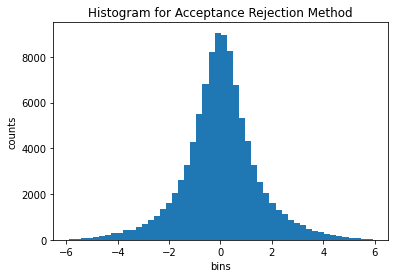

The Efficiency for the Acceptance-Rejection method is:  0.21282029454328766


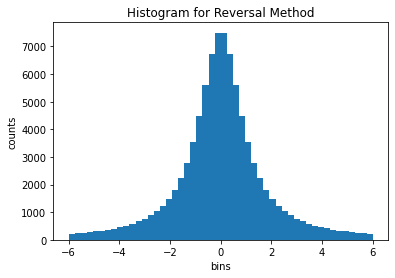

The Efficiency for the Reversal method is:  0.89485


In [7]:
# Example
# generate 100000 random numbers in the range (for x): [-6,6]
# For the distribution function f(x) = 1 / (1+x^2)

f = lambda x : 1/(1+x**2)
# CDF reverse function, found mathematically for the given example
f_rev = lambda x: np.tan(np.arctan(6)*(2*x-1))

# variables initialization
rng = np.arange(-6,7,1)
acception_rejection_range = [i for i in f(rng)]
# range for the rectangular area for the acceptance - rejection method
rng_x = [-6,6]
rng_y = [min(acception_rejection_range),max(acception_rejection_range)]
n = 100000


rej_list = acceptance_rejection(n, f, rng_x, rng_y) 
rev_list = reverse_random(n, f_rev, rng_x)

plt.hist(rej_list[1],50)
plt.title('Histogram for Acceptance Rejection Method')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()

print('The Efficiency for the Acceptance-Rejection method is: ',rej_list[0])

plt.hist(rev_list[1],50)
plt.title('Histogram for Reversal Method')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()

print('The Efficiency for the Reversal method is: ',rev_list[0])

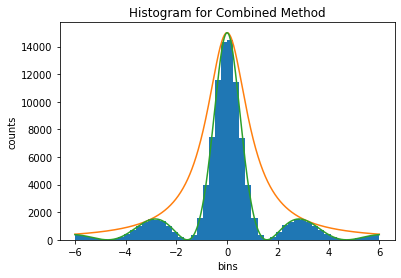

The Efficiency for the Combined method is:  0.5739078533550653


In [10]:
# Example - Continue
# generate 100000 random numbers in the range (for x): [-6,6]
# For the distribution function f(x) = 1/(1+x^2) * cos(x)^2
# Using the combined method

# In this case - the bounded function which is reversal is the one used in the example above
# f(x) = 1/(1+x^2)

f_new = lambda x : ((np.cos(x)**2)/(1+x**2))

n = 100000
x = np.linspace(-6,6,1000)

combined_list = combined_random(n, f, f_rev, f_new) 

plt.hist(combined_list[1],50)
plt.plot(x,f(x)*15000) # bounded function
plt.plot(x,f_new(x)*15000) # original function
plt.title('Histogram for Combined Method')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()

print('The Efficiency for the Combined method is: ',combined_list[0])